# d-q座標系におけるLCL回路のインピーダンス
下に示すLCL回路のd-q座標上でのインピーダンスを求める。

<img src="LCL.png" width="400px"/>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 並列演算記号'//'のオーバーライド
## 関数parallelを定義
def parallel(self, other):
    return self * other / (self + other)

## Symbol, Add, Mulのアトリビュート__floordiv__()をparallel()でオーバーライド
sp.Symbol.__floordiv__ = parallel
sp.Add.__floordiv__ = parallel
sp.Mul.__floordiv__ = parallel

# 回路要素のシンボル
R1, L1, R2, L2, C, Rp = sp.symbols('R_1 L_1 R_2 L_2 C R_p', real = True, positive = True)

# ラプラス演算子のシンボル（便宜上，real = Trueとする）
s = sp.symbols('s', real = True)

# 角周波数のシンボル
omega, omega1 = sp.symbols('omega omega_1', real = True)

In [2]:
# 静止(α-β)座標系でのインピーダンス
Zs = R1 + s * L1 + (R2 + s * L2) // (1 / (s * C) // Rp)

# ただのRL直列回路の場合
# Zs = R1 + s * L1

In [3]:
Zs.ratsimp().collect(s)

L_1*s + R_1 + (L_2*R_p*s + R_2*R_p)/(C*L_2*R_p*s**2 + R_2 + R_p + s*(C*R_2*R_p + L_2))

In [4]:
# 回転(d-q)座標系でのインピーダンス
Z = Zs.subs(s, (s - sp.I * omega1))

In [5]:
# 対角成分
Zd = sp.re(Z).simplify()

In [6]:
## 対角成分の式の整理
### 分子の抽出
Zd_num = sp.numer(Zd).expand().collect(s)

In [7]:
Zd_num

C**2*L_1*L_2**2*R_p**2*s**5 + C**2*L_2**2*R_1*R_p**2*omega_1**4 + C**2*R_1*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_1*R_p**2*omega_1**2 + L_2**2*R_1*omega_1**2 + L_2**2*R_p*omega_1**2 + R_1*R_2**2 + 2*R_1*R_2*R_p + R_1*R_p**2 + R_2**2*R_p + R_2*R_p**2 + s**4*(2*C**2*L_1*L_2*R_2*R_p**2 + C**2*L_2**2*R_1*R_p**2 + 2*C*L_1*L_2**2*R_p) + s**3*(2*C**2*L_1*L_2**2*R_p**2*omega_1**2 + C**2*L_1*R_2**2*R_p**2 + 2*C**2*L_2*R_1*R_2*R_p**2 + 4*C*L_1*L_2*R_2*R_p + 2*C*L_1*L_2*R_p**2 + 2*C*L_2**2*R_1*R_p + C*L_2**2*R_p**2 + L_1*L_2**2) + s**2*(2*C**2*L_1*L_2*R_2*R_p**2*omega_1**2 + 2*C**2*L_2**2*R_1*R_p**2*omega_1**2 + C**2*R_1*R_2**2*R_p**2 + 2*C*L_1*L_2**2*R_p*omega_1**2 + 2*C*L_1*R_2**2*R_p + 2*C*L_1*R_2*R_p**2 + 4*C*L_2*R_1*R_2*R_p + 2*C*L_2*R_1*R_p**2 + 2*C*L_2*R_2*R_p**2 + 2*L_1*L_2*R_2 + 2*L_1*L_2*R_p + L_2**2*R_1 + L_2**2*R_p) + s*(C**2*L_1*L_2**2*R_p**2*omega_1**4 + C**2*L_1*R_2**2*R_p**2*omega_1**2 + 2*C**2*L_2*R_1*R_2*R_p**2*omega_1**2 - 2*C*L_1*L_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_1*R_p*omega_

In [8]:
### 分子の係数
A5 = Zd_num.coeff(s, 5)
A4 = Zd_num.coeff(s, 4)
A3 = Zd_num.coeff(s, 3)
A2 = Zd_num.coeff(s, 2)
A1 = Zd_num.coeff(s, 1)
A0 = Zd_num.coeff(s, 0)

In [9]:
A5

C**2*L_1*L_2**2*R_p**2

In [10]:
A4

2*C**2*L_1*L_2*R_2*R_p**2 + C**2*L_2**2*R_1*R_p**2 + 2*C*L_1*L_2**2*R_p

In [11]:
A3

2*C**2*L_1*L_2**2*R_p**2*omega_1**2 + C**2*L_1*R_2**2*R_p**2 + 2*C**2*L_2*R_1*R_2*R_p**2 + 4*C*L_1*L_2*R_2*R_p + 2*C*L_1*L_2*R_p**2 + 2*C*L_2**2*R_1*R_p + C*L_2**2*R_p**2 + L_1*L_2**2

In [12]:
A2

2*C**2*L_1*L_2*R_2*R_p**2*omega_1**2 + 2*C**2*L_2**2*R_1*R_p**2*omega_1**2 + C**2*R_1*R_2**2*R_p**2 + 2*C*L_1*L_2**2*R_p*omega_1**2 + 2*C*L_1*R_2**2*R_p + 2*C*L_1*R_2*R_p**2 + 4*C*L_2*R_1*R_2*R_p + 2*C*L_2*R_1*R_p**2 + 2*C*L_2*R_2*R_p**2 + 2*L_1*L_2*R_2 + 2*L_1*L_2*R_p + L_2**2*R_1 + L_2**2*R_p

In [13]:
A1

C**2*L_1*L_2**2*R_p**2*omega_1**4 + C**2*L_1*R_2**2*R_p**2*omega_1**2 + 2*C**2*L_2*R_1*R_2*R_p**2*omega_1**2 - 2*C*L_1*L_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_1*R_p*omega_1**2 + C*L_2**2*R_p**2*omega_1**2 + 2*C*R_1*R_2**2*R_p + 2*C*R_1*R_2*R_p**2 + C*R_2**2*R_p**2 + L_1*L_2**2*omega_1**2 + L_1*R_2**2 + 2*L_1*R_2*R_p + L_1*R_p**2 + 2*L_2*R_1*R_2 + 2*L_2*R_1*R_p + 2*L_2*R_2*R_p + L_2*R_p**2

In [14]:
A0

C**2*L_2**2*R_1*R_p**2*omega_1**4 + C**2*R_1*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_1*R_p**2*omega_1**2 + L_2**2*R_1*omega_1**2 + L_2**2*R_p*omega_1**2 + R_1*R_2**2 + 2*R_1*R_2*R_p + R_1*R_p**2 + R_2**2*R_p + R_2*R_p**2

In [15]:
### 分母の抽出
Zd_den = sp.denom(Zd).expand().collect(s)

In [16]:
Zd_den

C**2*L_2**2*R_p**2*omega_1**4 + C**2*L_2**2*R_p**2*s**4 + C**2*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_p**2*omega_1**2 + L_2**2*omega_1**2 + R_2**2 + 2*R_2*R_p + R_p**2 + s**3*(2*C**2*L_2*R_2*R_p**2 + 2*C*L_2**2*R_p) + s**2*(2*C**2*L_2**2*R_p**2*omega_1**2 + C**2*R_2**2*R_p**2 + 4*C*L_2*R_2*R_p + 2*C*L_2*R_p**2 + L_2**2) + s*(2*C**2*L_2*R_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_p*omega_1**2 + 2*C*R_2**2*R_p + 2*C*R_2*R_p**2 + 2*L_2*R_2 + 2*L_2*R_p)

In [17]:
### 分母の係数
B3 = Zd_den.coeff(s, 3)
B2 = Zd_den.coeff(s, 2)
B1 = Zd_den.coeff(s, 1)
B0 = Zd_den.coeff(s, 0)

In [18]:
B3

2*C**2*L_2*R_2*R_p**2 + 2*C*L_2**2*R_p

In [19]:
B2

2*C**2*L_2**2*R_p**2*omega_1**2 + C**2*R_2**2*R_p**2 + 4*C*L_2*R_2*R_p + 2*C*L_2*R_p**2 + L_2**2

In [20]:
B1

2*C**2*L_2*R_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_p*omega_1**2 + 2*C*R_2**2*R_p + 2*C*R_2*R_p**2 + 2*L_2*R_2 + 2*L_2*R_p

In [21]:
B0

C**2*L_2**2*R_p**2*omega_1**4 + C**2*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_p**2*omega_1**2 + L_2**2*omega_1**2 + R_2**2 + 2*R_2*R_p + R_p**2

In [22]:
# 非対角成分（干渉項）
Zq = sp.im(Z).simplify()

In [23]:
## 非対角成分の式の整理
### 分子の抽出
Zq_num = sp.numer(Zq).expand().collect(s)

In [24]:
Zq_num

-C**2*L_1*L_2**2*R_p**2*omega_1**5 - C**2*L_1*L_2**2*R_p**2*omega_1*s**4 - C**2*L_1*R_2**2*R_p**2*omega_1**3 + 2*C*L_1*L_2*R_p**2*omega_1**3 + C*L_2**2*R_p**2*omega_1**3 + C*R_2**2*R_p**2*omega_1 - L_1*L_2**2*omega_1**3 - L_1*R_2**2*omega_1 - 2*L_1*R_2*R_p*omega_1 - L_1*R_p**2*omega_1 - L_2*R_p**2*omega_1 + s**3*(-2*C**2*L_1*L_2*R_2*R_p**2*omega_1 - 2*C*L_1*L_2**2*R_p*omega_1) + s**2*(-2*C**2*L_1*L_2**2*R_p**2*omega_1**3 - C**2*L_1*R_2**2*R_p**2*omega_1 - 4*C*L_1*L_2*R_2*R_p*omega_1 - 2*C*L_1*L_2*R_p**2*omega_1 + C*L_2**2*R_p**2*omega_1 - L_1*L_2**2*omega_1) + s*(-2*C**2*L_1*L_2*R_2*R_p**2*omega_1**3 - 2*C*L_1*L_2**2*R_p*omega_1**3 - 2*C*L_1*R_2**2*R_p*omega_1 - 2*C*L_1*R_2*R_p**2*omega_1 + 2*C*L_2*R_2*R_p**2*omega_1 - 2*L_1*L_2*R_2*omega_1 - 2*L_1*L_2*R_p*omega_1)

In [25]:
### 分子の係数
C4 = Zq_num.coeff(s, 4)
C3 = Zq_num.coeff(s, 3)
C2 = Zq_num.coeff(s, 2)
C1 = Zq_num.coeff(s, 1)
C0 = Zq_num.coeff(s, 0)

In [26]:
C4

-C**2*L_1*L_2**2*R_p**2*omega_1

In [27]:
C3

-2*C**2*L_1*L_2*R_2*R_p**2*omega_1 - 2*C*L_1*L_2**2*R_p*omega_1

In [28]:
C2

-2*C**2*L_1*L_2**2*R_p**2*omega_1**3 - C**2*L_1*R_2**2*R_p**2*omega_1 - 4*C*L_1*L_2*R_2*R_p*omega_1 - 2*C*L_1*L_2*R_p**2*omega_1 + C*L_2**2*R_p**2*omega_1 - L_1*L_2**2*omega_1

In [29]:
C1

-2*C**2*L_1*L_2*R_2*R_p**2*omega_1**3 - 2*C*L_1*L_2**2*R_p*omega_1**3 - 2*C*L_1*R_2**2*R_p*omega_1 - 2*C*L_1*R_2*R_p**2*omega_1 + 2*C*L_2*R_2*R_p**2*omega_1 - 2*L_1*L_2*R_2*omega_1 - 2*L_1*L_2*R_p*omega_1

In [30]:
C0

-C**2*L_1*L_2**2*R_p**2*omega_1**5 - C**2*L_1*R_2**2*R_p**2*omega_1**3 + 2*C*L_1*L_2*R_p**2*omega_1**3 + C*L_2**2*R_p**2*omega_1**3 + C*R_2**2*R_p**2*omega_1 - L_1*L_2**2*omega_1**3 - L_1*R_2**2*omega_1 - 2*L_1*R_2*R_p*omega_1 - L_1*R_p**2*omega_1 - L_2*R_p**2*omega_1

In [31]:
### 分母の抽出
Zq_den= sp.denom(Zq).expand().collect(s)

In [32]:
Zq_den

C**2*L_2**2*R_p**2*omega_1**4 + C**2*L_2**2*R_p**2*s**4 + C**2*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_p**2*omega_1**2 + L_2**2*omega_1**2 + R_2**2 + 2*R_2*R_p + R_p**2 + s**3*(2*C**2*L_2*R_2*R_p**2 + 2*C*L_2**2*R_p) + s**2*(2*C**2*L_2**2*R_p**2*omega_1**2 + C**2*R_2**2*R_p**2 + 4*C*L_2*R_2*R_p + 2*C*L_2*R_p**2 + L_2**2) + s*(2*C**2*L_2*R_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_p*omega_1**2 + 2*C*R_2**2*R_p + 2*C*R_2*R_p**2 + 2*L_2*R_2 + 2*L_2*R_p)

In [33]:
### 分母の係数
D4 = Zq_den.coeff(s, 4)
D3 = Zq_den.coeff(s, 3)
D2 = Zq_den.coeff(s, 2)
D1 = Zq_den.coeff(s, 1)
D0 = Zq_den.coeff(s, 0)

In [34]:
D4

C**2*L_2**2*R_p**2

In [35]:
D3

2*C**2*L_2*R_2*R_p**2 + 2*C*L_2**2*R_p

In [36]:
D2

2*C**2*L_2**2*R_p**2*omega_1**2 + C**2*R_2**2*R_p**2 + 4*C*L_2*R_2*R_p + 2*C*L_2*R_p**2 + L_2**2

In [37]:
D1

2*C**2*L_2*R_2*R_p**2*omega_1**2 + 2*C*L_2**2*R_p*omega_1**2 + 2*C*R_2**2*R_p + 2*C*R_2*R_p**2 + 2*L_2*R_2 + 2*L_2*R_p

In [38]:
D0

C**2*L_2**2*R_p**2*omega_1**4 + C**2*R_2**2*R_p**2*omega_1**2 - 2*C*L_2*R_p**2*omega_1**2 + L_2**2*omega_1**2 + R_2**2 + 2*R_2*R_p + R_p**2

In [39]:
# 関数の定義と回路定数の代入
# 回路定数
_R1 = 50e-3 # [Ω]
_L1 = 0.8e-3 # [H]
_R2 = 50e-3 # [Ω]
_L2 = 0.8e-3 # [H]
_C = 5e-6 # [F]
_Rp = 1e3 # [Ω]
_omega1 = 2 * sp.pi * 50 # [rad/s] 

# 対角成分関数の定義(lamnbdify)
_Zd = Zd.subs([(R1, _R1), (L1, _L1), (R2, _R2), (L2, _L2), (C, _C), (Rp, _Rp), (omega1, _omega1), (s, sp.I * omega)])
Zd_FRA = sp.lambdify(omega, _Zd, "numpy")

# 非対角成分（干渉項）関数の定義(lamnbdify)
_Zq = Zq.subs([(R1, _R1), (L1, _L1), (R2, _R2), (L2, _L2), (C, _C), (Rp, _Rp), (omega1, _omega1), (s, sp.I * omega)])
Zq_FRA = sp.lambdify(omega, _Zq, "numpy")

In [40]:
_Zd

(8000.0*pi**2*(8.0e-6*I*omega + 0.00105) + (0.0008*I*omega + 0.05)*(0.011025*pi**2*(0.00761904761904762*I*omega + 1)**2 + 1000100.0025*(-3.9998000099995e-9*omega**2 + 1.04994750262487e-6*I*omega - 3.9998000099995e-5*pi**2 + 1)**2) + 1000.0*(0.0008*I*omega + 0.05)*(-4.0e-6*omega**2 + 0.00105*I*omega - 0.04*pi**2 + 1000.05))/(0.011025*pi**2*(0.00761904761904762*I*omega + 1)**2 + 1000100.0025*(-3.9998000099995e-9*omega**2 + 1.04994750262487e-6*I*omega - 3.9998000099995e-5*pi**2 + 1)**2)

In [41]:
_Zq

100*pi*(3.2e-6*omega**2 - 0.00084*I*omega + 1000.0*(8.0e-6*I*omega + 0.00105)*(0.0008*I*omega + 0.05) - 8.82e-6*pi**2*(0.00761904761904762*I*omega + 1)**2 - 800.080002*(-3.9998000099995e-9*omega**2 + 1.04994750262487e-6*I*omega - 3.9998000099995e-5*pi**2 + 1)**2 - 800.04 + 0.032*pi**2)/(0.011025*pi**2*(0.00761904761904762*I*omega + 1)**2 + 1000100.0025*(-3.9998000099995e-9*omega**2 + 1.04994750262487e-6*I*omega - 3.9998000099995e-5*pi**2 + 1)**2)

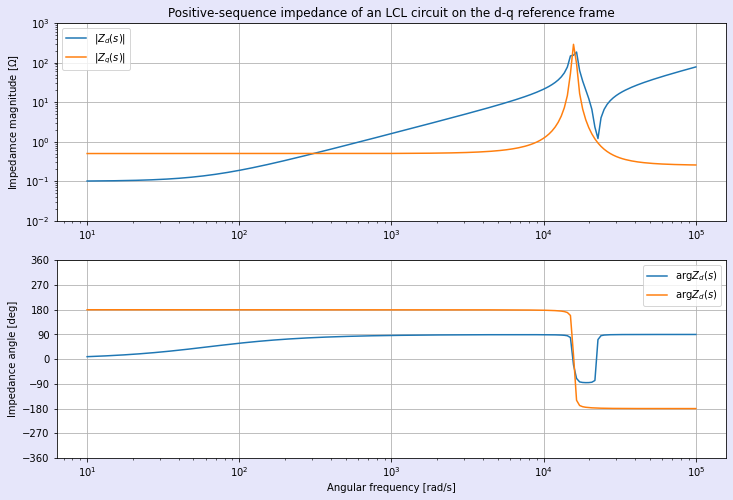

In [42]:
# ボード線図のプロット（正相成分）
## データ生成
omega = np.logspace(1, 5, 200)
Zd_bode = Zd_FRA(omega)
Zq_bode = Zq_FRA(omega)

## ボード線図のプロット
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
fig.patch.set_facecolor('lavender')

## 絶対値
ax[0].set_title(f'Positive-sequence impedance of an LCL circuit on the d-q reference frame')
ax[0].loglog(omega, np.abs(Zd_bode), ls = '-', label = r'$|Z_d(s)|$')
ax[0].loglog(omega, np.abs(Zq_bode), ls = '-', label = r'$|Z_q(s)|$')
ax[0].set_ylabel(r'Impedamce magnitude [$\Omega$]')
# ax[0].set_xlim(1e2, 1e4)
ax[0].set_ylim(0.01, 1e3)
ax[0].legend()
ax[0].grid()

## 偏角
ax[1].semilogx(omega, np.rad2deg(np.unwrap(np.angle(Zd_bode))), ls = '-', label = r'$\arg Z_d(s)$')
ax[1].semilogx(omega, np.rad2deg(np.unwrap(np.angle(Zq_bode))), ls = '-', label = r'$\arg Z_d(s)$')
# ax[1].set_xlim(1e2, 1e4)
ax[1].set_xlabel('Angular frequency [rad/s]')
ax[1].set_ylabel('Impedance angle [deg]')
ax[1].set_ylim(-360, 360)
ax[1].set_yticks(range(-360, 450, 90))
ax[1].legend()
ax[1].grid()

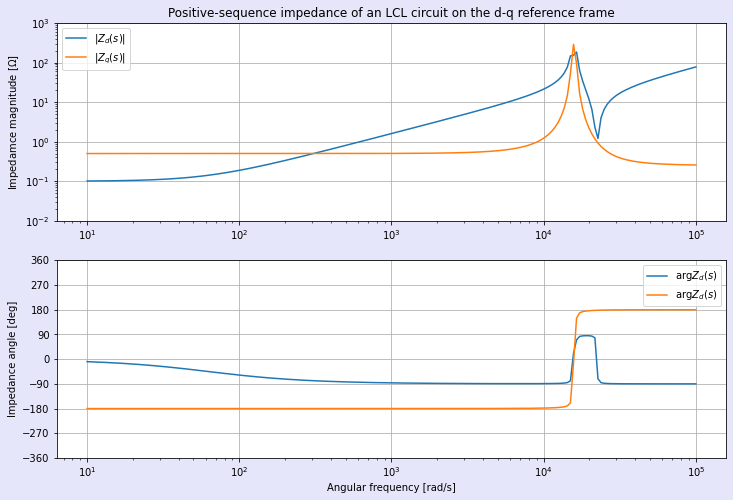

In [43]:
# ボード線図のプロット（逆相成分）
## データ生成
omega = np.logspace(1, 5, 200)
Zd_bode = Zd_FRA(-omega)
Zq_bode = Zq_FRA(-omega)

## ボード線図のプロット
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
fig.patch.set_facecolor('lavender')

## 絶対値
ax[0].set_title(f'Positive-sequence impedance of an LCL circuit on the d-q reference frame')
ax[0].loglog(omega, np.abs(Zd_bode), ls = '-', label = r'$|Z_d(s)|$')
ax[0].loglog(omega, np.abs(Zq_bode), ls = '-', label = r'$|Z_q(s)|$')
ax[0].set_ylabel(r'Impedamce magnitude [$\Omega$]')
# ax[0].set_xlim(1e2, 1e4)
ax[0].set_ylim(0.01, 1e3)
ax[0].legend()
ax[0].grid()

## 偏角
ax[1].semilogx(omega, np.rad2deg(np.unwrap(np.angle(Zd_bode))), ls = '-', label = r'$\arg Z_d(s)$')
ax[1].semilogx(omega, np.rad2deg(np.unwrap(np.angle(Zq_bode))), ls = '-', label = r'$\arg Z_d(s)$')
# ax[1].set_xlim(1e2, 1e4)
ax[1].set_xlabel('Angular frequency [rad/s]')
ax[1].set_ylabel('Impedance angle [deg]')
ax[1].set_ylim(-360, 360)
ax[1].set_yticks(range(-360, 450, 90))
ax[1].legend()
ax[1].grid()